In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

print(f'TensorFlow Version: {tf.__version__}')

TensorFlow Version: 2.3.0


# Data preprocessing

## Data download

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
print(f'Path of the ZIP: {path_to_zip}')

68608000/68606236 [==============================] - 49s 1us/step
Path of the ZIP: /home/kdd/.keras/datasets/cats_and_dogs.zip


In [3]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(f'Path of the images: {PATH}')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(f'Path of train data: {train_dir}')
print(f'Path of validation data: {validation_dir}')

Path of the images: /home/kdd/.keras/datasets/cats_and_dogs_filtered
Path of train data: /home/kdd/.keras/datasets/cats_and_dogs_filtered/train
Path of validation data: /home/kdd/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)
print(type(train_dataset))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [5]:
# for i, (images, labels) in enumerate(train_dataset.take(1)):
#     print(images.shape)
#     print(labels.shape)
#     if i==5:
#         break

(32, 160, 160, 3)
(32,)


In [6]:
for images, labels in train_dataset.take(1):
    print(images.shape)
    print(labels.shape)

(32, 160, 160, 3)
(32,)


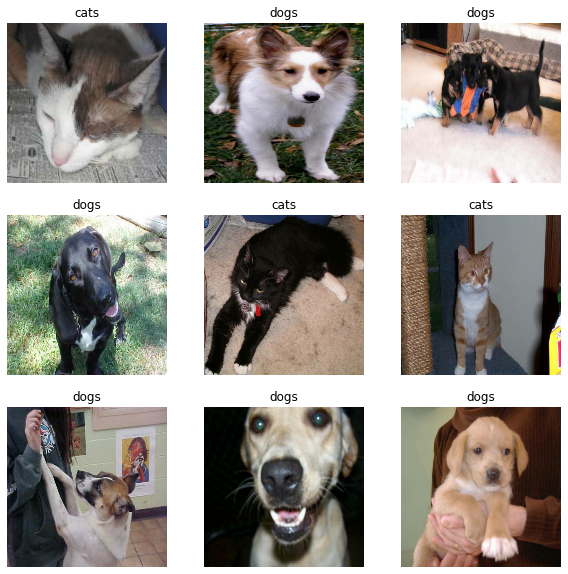

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [8]:
# 从valida_dataset中拆分出测试集
val_batches = tf.data.experimental.cardinality(validation_dataset) # 确定验证集中有多少个batch
test_dataset = validation_dataset.take(val_batches // 5) # 20%用作测试集
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


## Config the dataset for performance
- Use buffered prefetching to load images from disk without having I/O become blocking

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Use data augmentation

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])  # 这些层在训练的时候才会被激活，推断的时候不会被激活

(160, 160, 3)


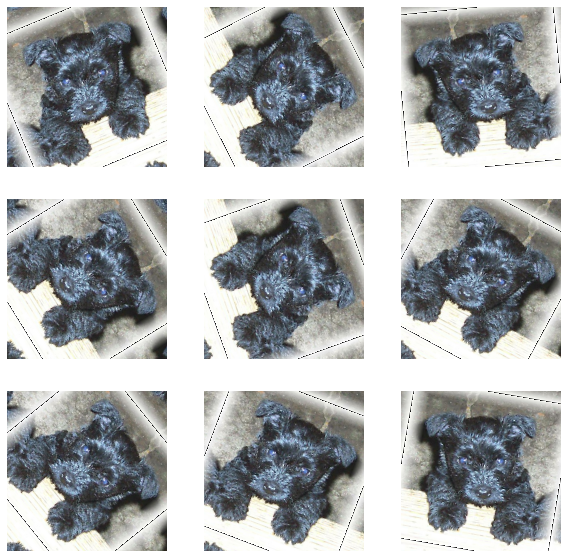

In [11]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    print(first_image.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')